In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df=pd.read_csv(r'E:\tensorrt\Trip\SPIGA-main\merged_df.csv')
df_gaze=pd.read_csv(r'E:\tensorrt\Trip\gaze_detection_20_03.csv')

#### Making the datframes the same length



In [29]:
len(df_gaze),len(df)

(13887, 13876)

In [ ]:
df_gaze.loc[df_gaze['pitch_eye'] > 10, 'pitch_eye'] = np.nan
df_gaze.loc[df_gaze['yaw_eye'] > 10, 'yaw_eye'] = np.nan
pitch_median = df_gaze['pitch_eye'].median()
yaw_median=df_gaze['yaw_eye'].median()
df_gaze['pitch_eye'].fillna(pitch_median, inplace=True)
df_gaze['yaw_eye'].fillna(yaw_median, inplace=True)

In [31]:
df_gaze_trimmed = df_gaze.iloc[6:]
df_gaze_trimmed = df_gaze_trimmed.iloc[:-5]
df_gaze_trimmed = df_gaze_trimmed.reset_index(drop=True)

In [32]:
merged_df=pd.concat((df,df_gaze_trimmed),axis=1)

In [33]:
merged_df.columns

Index(['Unnamed: 0', 'Pitch', 'Yaw', 'Roll', 'Pitch_Norm', 'Roll_Norm',
       'Yaw_Norm', 'head_pose', 'EAR_left', 'EAR_right', 'IRIS_left_x',
       'IRIS_left_y', 'IRIS_right_x', 'IRIS_right_y', 'eye_class', 'DatTime',
       'MediaTime', 'LonAccel', 'LatAccel', 'Throttle', 'Brake', 'Gear',
       'Heading', 'HeadwayDistance', 'HeadwayTime', 'Lane', 'LaneOffset',
       'RoadOffset', 'Steer', 'Velocity', 'XPos', 'YPos', 'LeadVehPosX',
       'LeadVehPosY', 'FollowCarBrakingStatus', 'Timestamp', 'count',
       'pitch_eye', 'yaw_eye'],
      dtype='object')

In [34]:
merged_df.drop(columns=['Unnamed: 0','Pitch_Norm','Yaw_Norm','Roll_Norm','Gear','Timestamp','count','DatTime'],inplace=True)

In [35]:
merged_df[merged_df['eye_class']==1]['head_pose'].value_counts()

head_pose
0    1029
2     338
1     145
3      30
Name: count, dtype: int64

In [36]:
drowsy_front=merged_df[(merged_df['eye_class']==1) & (merged_df['head_pose']==0)]

In [37]:
drowsy_front.columns

Index(['Pitch', 'Yaw', 'Roll', 'head_pose', 'EAR_left', 'EAR_right',
       'IRIS_left_x', 'IRIS_left_y', 'IRIS_right_x', 'IRIS_right_y',
       'eye_class', 'MediaTime', 'LonAccel', 'LatAccel', 'Throttle', 'Brake',
       'Heading', 'HeadwayDistance', 'HeadwayTime', 'Lane', 'LaneOffset',
       'RoadOffset', 'Steer', 'Velocity', 'XPos', 'YPos', 'LeadVehPosX',
       'LeadVehPosY', 'FollowCarBrakingStatus', 'pitch_eye', 'yaw_eye'],
      dtype='object')

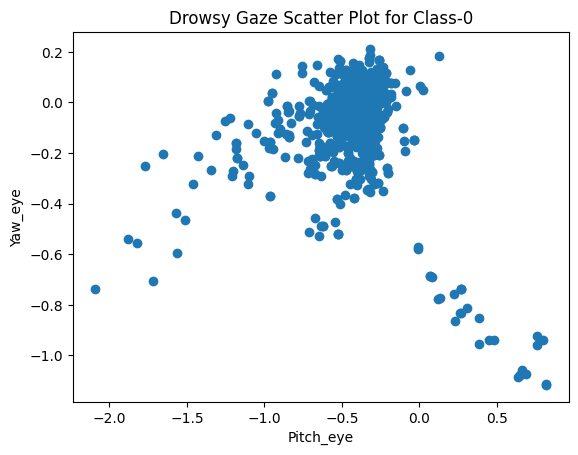

In [49]:
drowsy_front=merged_df[(merged_df['eye_class']==1) & (merged_df['head_pose']==0)]
plt.scatter(drowsy_front['pitch_eye'], drowsy_front['yaw_eye'])

plt.xlabel('Pitch_eye')
plt.ylabel('Yaw_eye')
plt.title('Drowsy Gaze Scatter Plot for Class-0')
plt.savefig('new_plots/drowsyGazeFront.png')
plt.show()

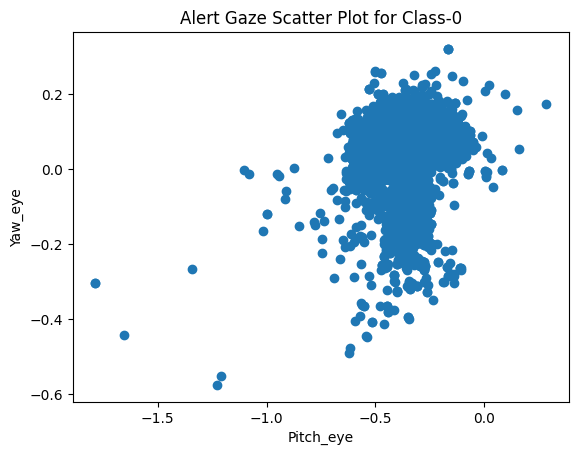

In [50]:
drowsy_front=merged_df[(merged_df['eye_class']==0) & (merged_df['head_pose']==0)]
plt.scatter(drowsy_front['pitch_eye'], drowsy_front['yaw_eye'])

plt.xlabel('Pitch_eye')
plt.ylabel('Yaw_eye')
plt.title('Alert Gaze Scatter Plot for Class-0')
plt.savefig('new_plots/alertGazeFront.png')
plt.show()

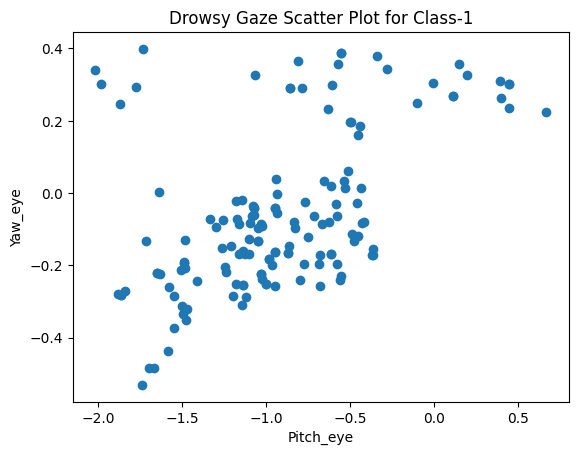

In [39]:

drowsy_1=merged_df[(merged_df['eye_class']==1) & (merged_df['head_pose']==1)]
plt.scatter(drowsy_1['pitch_eye'], drowsy_1['yaw_eye'])

plt.xlabel('Pitch Eye')
plt.ylabel('Yaw Eye')
plt.title('Drowsy Gaze Scatter Plot for Class-1')

plt.show()

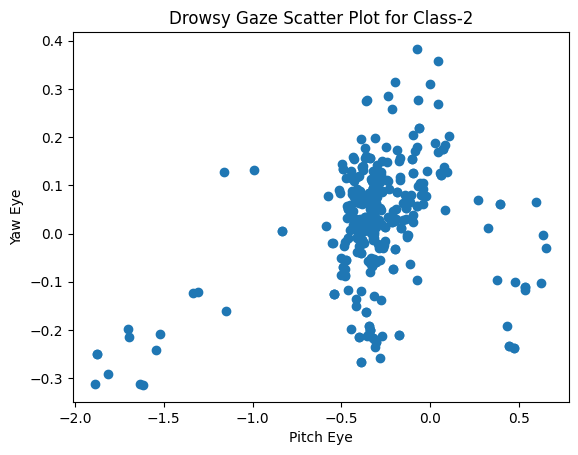

In [51]:
drowsy_2=merged_df[(merged_df['eye_class']==1) & (merged_df['head_pose']==2)]
plt.scatter(drowsy_2['pitch_eye'], drowsy_2['yaw_eye'])

plt.xlabel('Pitch Eye')
plt.ylabel('Yaw Eye')
plt.title('Drowsy Gaze Scatter Plot for Class-2')
plt.savefig('new_plots/drowsyGazeClass2.png')
plt.show()

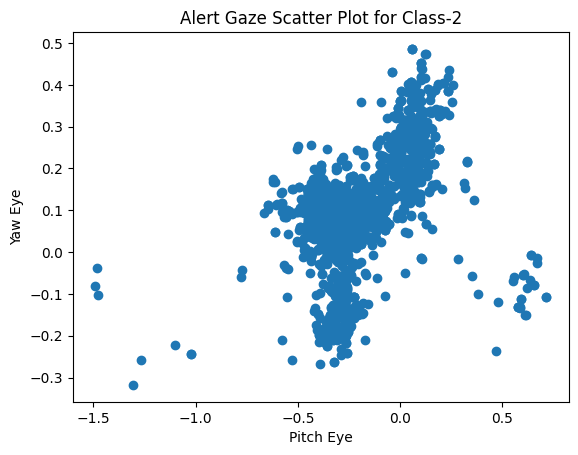

In [52]:
drowsy_2=merged_df[(merged_df['eye_class']==0) & (merged_df['head_pose']==2)]
plt.scatter(drowsy_2['pitch_eye'], drowsy_2['yaw_eye'])

plt.xlabel('Pitch Eye')
plt.ylabel('Yaw Eye')
plt.title('Alert Gaze Scatter Plot for Class-2')
plt.savefig('new_plots/alertGazeClass2.png')
plt.show()

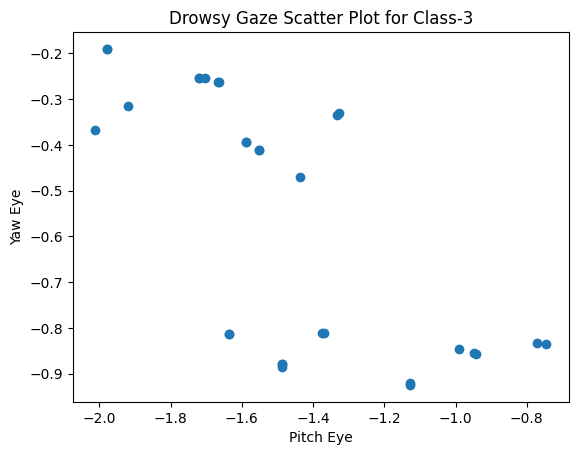

In [42]:
drowsy_3=merged_df[(merged_df['eye_class']==1) & (merged_df['head_pose']==3)]
plt.scatter(drowsy_3['pitch_eye'], drowsy_3['yaw_eye'])

plt.xlabel('Pitch Eye')
plt.ylabel('Yaw Eye')
plt.title('Drowsy Gaze Scatter Plot for Class-3')

plt.show()

In [67]:
df_drowsy=pd.read_csv(r'E:\tensorrt\Trip\SPIGA-main\drowsy_frames.csv')

In [69]:
df_drowsy.columns

Index(['Unnamed: 0', 'start_drowsy', 'end_drowsy', 'Duration'], dtype='object')

In [70]:
df_drowsy.drop(columns=['Unnamed: 0'],inplace=True)

In [112]:
column_list=list(merged_df.columns)
column_list.append('index')
df_cleaned=pd.DataFrame(columns=column_list)

In [113]:
for i in range(len(df_drowsy)):
    test=merged_df[df_drowsy['start_drowsy'][i]:df_drowsy['end_drowsy'][i]+1].copy()
    test['index']=merged_df[df_drowsy['start_drowsy'][i]:df_drowsy['end_drowsy'][i]+1].index
    mode_val=test['head_pose'].mode()[0]
    test['head_pose']=mode_val
    df_cleaned=pd.concat((df_cleaned,test))


C:\Users\CGI\AppData\Local\Temp\ipykernel_19956\2717743743.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_cleaned=pd.concat((df_cleaned,test))


In [120]:
alert_0=list(merged_df[(merged_df['eye_class']==0) & (merged_df['head_pose']==0)].index)
drowsy_0=list(df_cleaned[df_cleaned['head_pose']==0].index)

In [121]:
import cv2
path=r'Experimenter_9110002_53.mp4'
cap=cv2.VideoCapture(path)
width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps=cap.get(cv2.CAP_PROP_FPS)
fourcc=cv2.VideoWriter_fourcc(*'mp4v')
reduced_width=width//2
reduced_height=height//2
video_write_0=cv2.VideoWriter('class_0_alert_gaze_1.avi',fourcc,fps,(reduced_width,reduced_height))
video_write_1=cv2.VideoWriter('class_0_drowsy_gaze_1.avi',fourcc,fps,(reduced_width,reduced_height))
error_write=cv2.VideoWriter('error_frames.avi',fourcc,fps,(reduced_width,reduced_height))
frame_count=0
try:
    while cap.isOpened():
        ret,frame=cap.read()
        if not ret:
            break
        frame_scene=frame[height//2:,:width//2]
        timestamp = int(cap.get(cv2.CAP_PROP_POS_MSEC))


        if frame_count in alert_0:
            video_write_0.write(frame_scene)

        elif frame_count in drowsy_0:
            video_write_1.write(frame_scene)
        frame_count+=1
except Exception as e:
    print("Error")
    error_write.write(frame_scene)

    

cap.release()
error_write.release()
video_write_0.release()
video_write_1.release()
print("Done with the program")


Done with the program


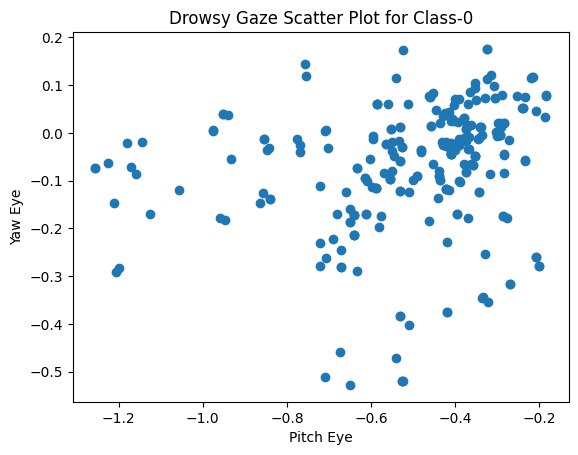

In [124]:
drowsy_2=df_cleaned[(df_cleaned['eye_class']==1) & (df_cleaned['head_pose']==0)]
plt.scatter(drowsy_2['pitch_eye'], drowsy_2['yaw_eye'])

plt.xlabel('Pitch Eye')
plt.ylabel('Yaw Eye')
plt.title('Drowsy Gaze Scatter Plot for Class-0')
plt.savefig('new_plots/drowsyGazeClass2.png')
plt.show()

In [125]:
alert_2=list(merged_df[(merged_df['eye_class']==0) & (merged_df['head_pose']==2)].index)
drowsy_2=list(df_cleaned[df_cleaned['head_pose']==2].index)

In [126]:
import cv2
path=r'Experimenter_9110002_53.mp4'
cap=cv2.VideoCapture(path)
width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps=cap.get(cv2.CAP_PROP_FPS)
fourcc=cv2.VideoWriter_fourcc(*'mp4v')
reduced_width=width//2
reduced_height=height//2
video_write_0=cv2.VideoWriter('class_2_alert_gaze_1.avi',fourcc,fps,(reduced_width,reduced_height))
video_write_1=cv2.VideoWriter('class_2_drowsy_gaze_1.avi',fourcc,fps,(reduced_width,reduced_height))
error_write=cv2.VideoWriter('error_frames.avi',fourcc,fps,(reduced_width,reduced_height))
frame_count=0
try:
    while cap.isOpened():
        ret,frame=cap.read()
        if not ret:
            break
        frame_scene=frame[height//2:,:width//2]
        timestamp = int(cap.get(cv2.CAP_PROP_POS_MSEC))


        if frame_count in alert_2:
            video_write_0.write(frame_scene)

        elif frame_count in drowsy_2:
            video_write_1.write(frame_scene)
        frame_count+=1
except Exception as e:
    print("Error")
    error_write.write(frame_scene)

    

cap.release()
error_write.release()
video_write_0.release()
video_write_1.release()
print("Done with the program")


Done with the program
